In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
  Rolling back uninstall of numpy
  Moving to c:\users\taeeu\anaconda3\lib\site-packages\numpy-1.22.2.dist-info\
   from C:\Users\taeeu\anaconda3\Lib\site-packages\~umpy-1.22.2.dist-info
  Moving to c:\users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
   from C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-uninstall-6df5qj8n\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
  Moving to c:\users\taeeu\anaconda3\lib\site-packages\numpy\__config__.py
   from C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-uninstall-1kr465k8\__config__.py
  Moving to c:\users\taeeu\anaconda3\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\Public\Documents\ESTsoft\CreatorTemp\pip-uninstall-1k

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\taeeu\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [3]:
import numpy as np
import os
import tensorflow as tf

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 1) 데이터 로딩

In [5]:
np.random.seed(100)
# keras의 cifar10데이터를 로드해옴
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 50000개-training 이미지, 10000개-test 이미지

In [6]:
# train
# 32*32*3=3072bytes => 3개의 채널
print("X_train :", x_train.shape)
# 비행기/자동차/새/고양이/사슴/개/개구리/말/배/트럭 중 하나
print("y_train :", y_train.shape)

# test
print("X_test :", x_test.shape)
print("y_test :", y_test.shape)

X_train : (50000, 32, 32, 3)
y_train : (50000, 1)
X_test : (10000, 32, 32, 3)
y_test : (10000, 1)


[6], 

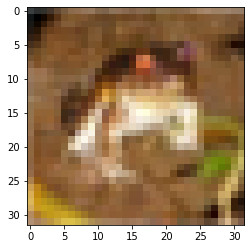

[9], 

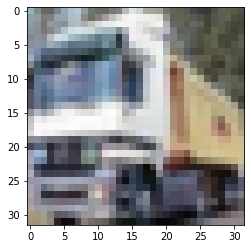

[9], 

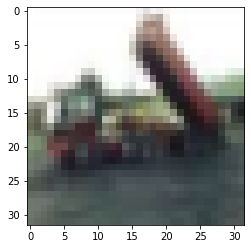

[4], 

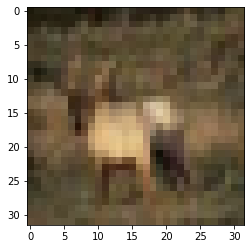

[1], 

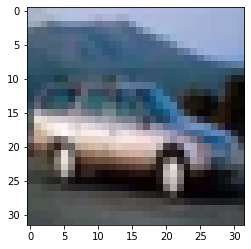

In [7]:
#데이터의 생김새 확인
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(5):
    plt.imshow(x_train[i])
    print(y_train[i], end=", ")
    plt.show()

# 2) 데이터 전처리

In [8]:
# 3차원-> 1차원으로 만들고 정규화시킴, y라벨은 -벡터로 변환
x_train=x_train.reshape(50000, 3072)
x_test=x_test.reshape(10000, 3072)

# 정규화!
# 이미지 : 픽셀 정보를 0~255사이로 가지는데 이를 정규화하여 0과 1 사이의 값을 갖게 해줌
x_train=(x_train-np.mean(x_train))/np.std(x_train)
x_test=(x_test-np.mean(x_test))/np.std(x_test)

In [9]:
# 10개의 Y값을 원핫인코딩을 통해서 벡터로 변환
# label을 (one-hot vector로 변환)
labels=10
y_train=to_categorical(y_train, labels)
y_test=to_categorical(y_test, labels)
y_train

print("y_train :", y_train)
print("y_text :", y_test)

y_train : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y_text : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# 3) 모델 정의 - 딥러닝 구현

In [10]:
# 이미 그려둔 그래프가 있다면 날려줘
# model에 순차적으로 레이어를 쌓아가겠다는 의도!

model=Sequential()

In [11]:
# 첫번째 레이어를 만들음
model.add(Dense(512, input_shape=(3072,), activation='relu', name='Hidden1'))
# 3072 input variables 
# 512 노드/뉴런
model.add(Dense(120, activation='relu', name='Hidden2'))
model.add(Dense(512, activation='relu', name='Hidden3'))

model.add(Dense(10, activation='sigmoid'))

In [12]:
# compile : 모델을 학습시키기 위한 학습과정을 설계하는 단계
# 1. loss='categorical_crossentropy':손실함수 지정/손실함수를 최소화하는 방향으로 가중치와 역치를 수정/대표함수중 하나인 categorical_crossentropy
# 2. optimizer='ada':훈련과정 설정. 이 함수를 최적화하는 방향으로 학습이 일어나는 대표적인 함수 중 하나인 'adam' 사용
# 3. metrics=['accuracy']:학습과정에서 정확도를 수집, 훈련과정을 모니터링 하는 과정
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [13]:
# model fit
# epochs : 10번 반복한다는 의미
# batch_size : 한번에 몇개씩 학습하는지? => 1024개씩 학습된다고 치면
# 학습데이터%batch_size=한 에포크당 몇번의 반복을 하는지
model.fit(x_train, y_train, batch_size=1024, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
49/49 [==============================] - 31s 504ms/step - loss: 1.7604 - accuracy: 0.3781 - val_loss: 1.5584 - val_accuracy: 0.4480
Epoch 2/10
49/49 [==============================] - 12s 253ms/step - loss: 1.4775 - accuracy: 0.4831 - val_loss: 1.4564 - val_accuracy: 0.4841
Epoch 3/10
49/49 [==============================] - 7s 144ms/step - loss: 1.3463 - accuracy: 0.5247 - val_loss: 1.4298 - val_accuracy: 0.5010
Epoch 4/10
49/49 [==============================] - 11s 233ms/step - loss: 1.2470 - accuracy: 0.5622 - val_loss: 1.4061 - val_accuracy: 0.5052
Epoch 5/10
49/49 [==============================] - 9s 177ms/step - loss: 1.1588 - accuracy: 0.5927 - val_loss: 1.3960 - val_accuracy: 0.5154
Epoch 6/10
49/49 [==============================] - 8s 157ms/step - loss: 1.0644 - accuracy: 0.6290 - val_loss: 1.3952 - val_accuracy: 0.5256
Epoch 7/10
49/49 [==============================] - 8s 160ms/step - loss: 0.9813 - accuracy: 0.6553 - val_loss: 1.3917 - val_accuracy: 0.5343
Epo

# 4) 모델 평가

In [15]:
# 모델 평가
# verbose : 얼마나 자세하게 정보를 표시할 것인가?
score=model.evaluate(x_test, y_test, verbose = 1)
print("loss=", score[0], 'test accuracy(정답율): ', score[1]*100)

313/313 [==============================] - 4s 12ms/step - loss: 1.4949 - accuracy: 0.5355
loss= 1.4948575496673584 test accuracy(정답율):  53.54999899864197


In [16]:
# 결과 예측
result_predict=model.predict_classes(x_test)
print(result_predict)
# 첫번째 사진부터 5번째 클래스로 예측..두번째 사진은 8번째 클래스로 예측

C:\Users\taeeu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[5 8 0 ... 2 6 7]
